# create figures for med4 DE long term 

In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

Warning message:
"package 'DESeq2' was built under R version 4.2.2"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
"package 'BiocGenerics' was built under R version 4.2.1"

Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    exp

In [2]:
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 4.2.1"


In [3]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [41]:
df_all_orig = read_csv(file.path('..', 'Enrichment','DE_results', 'MED4_all_FC_results.csv'))



Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 45475 Columns: 33
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): contrast, protein_id, Assay, contrast1, Name, gene, locus_tag, old...
dbl  (7): logFC, AveExpr, pvalue, padj, start, end, gene_length
lgl  (3): exception, down, up

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [42]:
t(head(df_all_orig,2))

contrast,C2 - C1,C2 - C1
protein_id,WP_011132009.1,WP_011132596.1
logFC,2.602933,1.795646
AveExpr,0.9167156,2.0464881
pvalue,5.951467e-07,8.763244e-07
padj,0.0004868287,0.0004868287
Assay,Proteome,Proteome
contrast1,C2vsC1_prot,C2vsC1_prot
Name,TX50_RS01980,ureC
gene,NA,ureC
locus_tag,TX50_RS01980,TX50_RS05125


In [43]:
help(summarise)

summarise {dplyr},R Documentation
.data,"A data frame, data frame extension (e.g. a tibble), or a lazy data frame (e.g. from dbplyr or dtplyr). See Methods, below, for more details."
...,"<data-masking> Name-value pairs of summary functions. The name will be the name of the variable in the result. The value can be: A vector of length 1, e.g. min(x), n(), or sum(is.na(y)). A data frame, to add multiple columns from a single expression. Returning values with size 0 or >1 was deprecated as of 1.1.0. Please use reframe() for this instead."
.by,"<tidy-select> Optionally, a selection of columns to group by for just this operation, functioning as an alternative to group_by(). For details and examples, see ?dplyr_by."
.groups,"Grouping structure of the result. ""drop_last"": dropping the last level of grouping. This was the only supported option before version 1.0.0. ""drop"": All levels of grouping are dropped. ""keep"": Same grouping structure as .data. ""rowwise"": Each row is its own group. When .groups is not specified, it is chosen based on the number of rows of the results: If all the results have 1 row, you get ""drop_last"". If the number of rows varies, you get ""keep"" (note that returning a variable number of rows was deprecated in favor of reframe(), which also unconditionally drops all levels of grouping). In addition, a message informs you of that choice, unless the result is ungrouped, the option ""dplyr.summarise.inform"" is set to FALSE, or when summarise() is called from a function in a package."


In [63]:
df_de_stats = df_all_orig %>% 
    mutate(is_de = padj < 0.05) %>%
    mutate(no_value = is.na(padj)) %>%
    group_by(Assay,contrast1) %>%
    summarise(
        Up=sum(up, na.rm = TRUE),
        Down=sum(down, na.rm = TRUE),
        #DE=sum(is_de, na.rm = TRUE),
        Unchanged=sum(!is_de, na.rm = TRUE),
        'N/A'=sum(no_value, na.rm = TRUE),
       # Total=n(),        
    )
df_de_stats

`summarise()` has grouped output by 'Assay'. You can override using the `.groups` argument.


Assay,contrast1,Up,Down,Unchanged,N/A
<chr>,<chr>,<int>,<int>,<int>,<int>
Proteome,C2vsC1_prot,106,50,1268,0
Proteome,C3vsC1_prot,242,251,931,0
Proteome,C3vsC2_prot,27,55,1342,0
Proteome,C4vsC1_prot,225,203,996,0
Proteome,C4vsC2_prot,193,208,1023,0
Proteome,C4vsC3_prot,179,133,1112,0
Proteome,C5vsC1_prot,241,263,920,0
Proteome,C5vsC2_prot,244,280,900,0
Proteome,C5vsC3_prot,212,236,976,0


In [64]:
mdf_de_stats= pivot_longer(
    df_de_stats, !Assay & !contrast1,  names_to = 'Status', values_to = 'n'
)

In [66]:
dput(unique(mdf_de_stats$Status))

c("Up", "Down", "Unchanged", "N/A")


In [71]:
mdf_de_stats = mdf_de_stats %>%
    #mutate(Status = factor(Status, levels = c("Up", "Down", "Unchanged", "N/A")))
    mutate(Status = factor(Status, levels = c("Up", "Down", "Unchanged", "N/A")))

# Create bar charts

Warning message:
"Removed 18 rows containing missing values (`geom_text()`)."


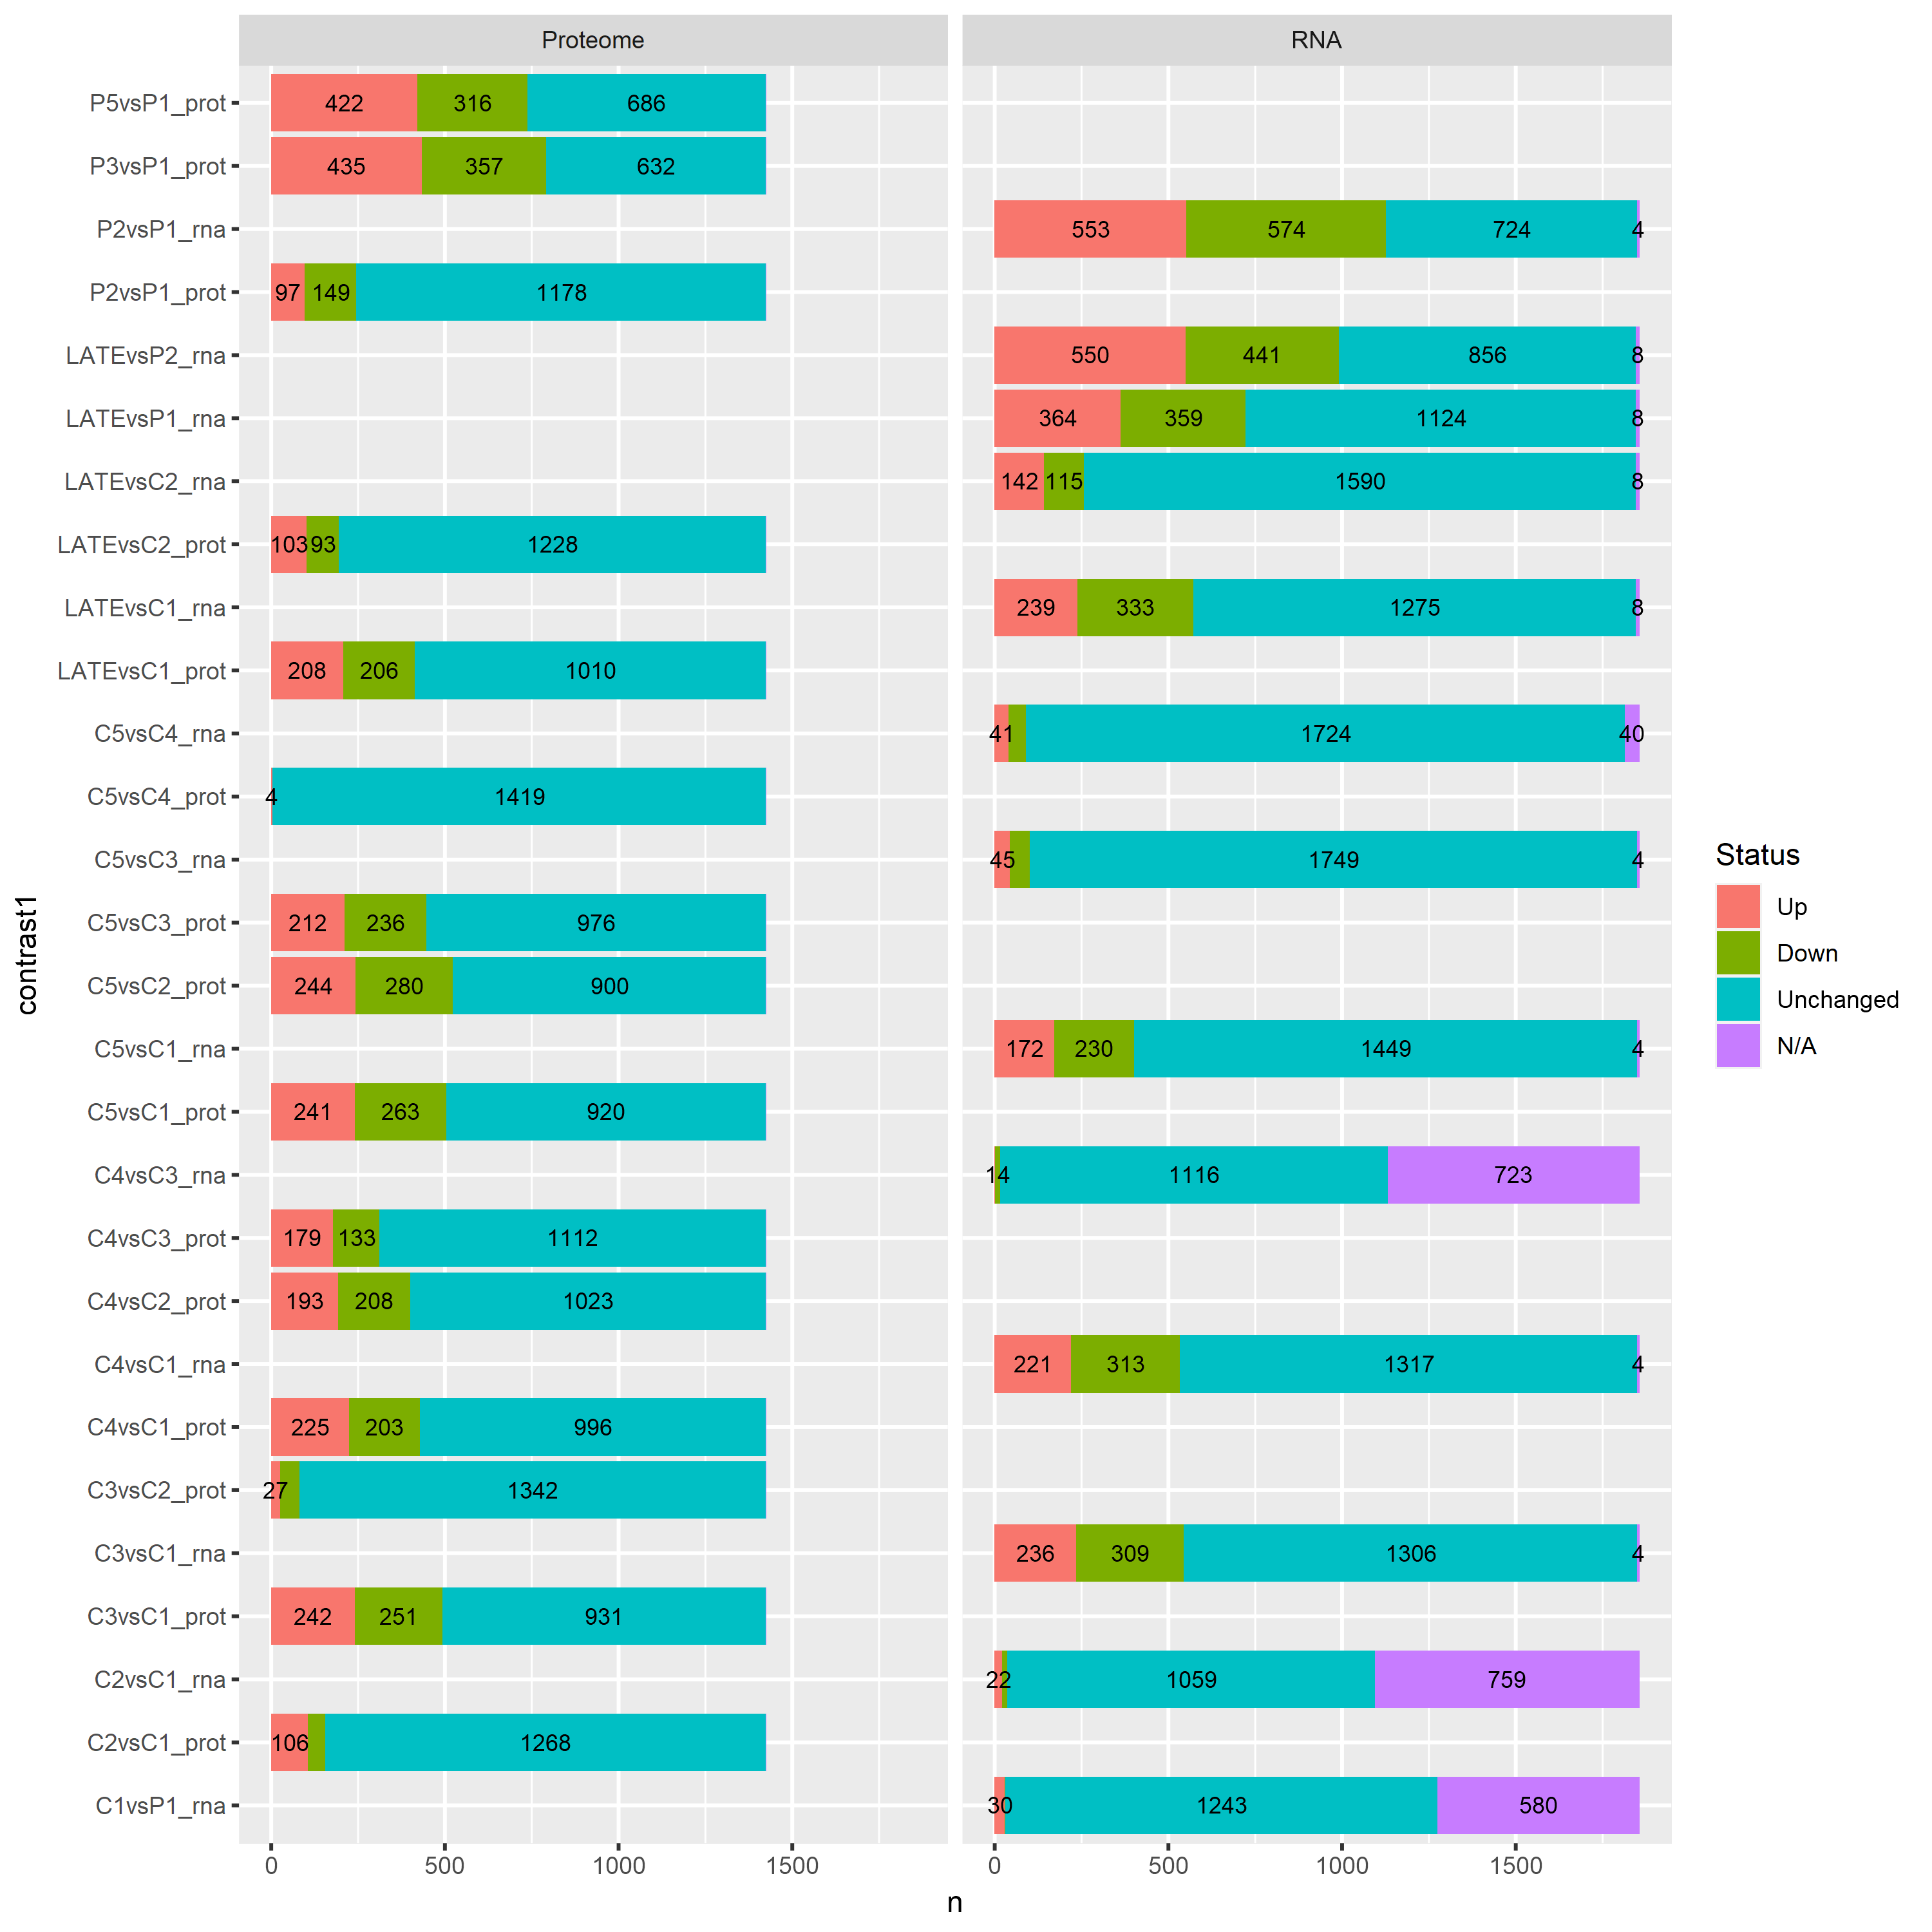

In [84]:
ggplot(mdf_de_stats, aes(y = contrast1, x = n, fill = Status)) +
  geom_col(position = position_stack(reverse = TRUE)) +
  geom_text(
    aes(label = ifelse(n < 3, NA, n)),
    position = position_stack(reverse = TRUE, vjust = 0.5),
    check_overlap = TRUE,
      size=3,
  ) +
    facet_grid(~Assay) 
  #labs(title = "Stacked Bar Chart with Labels")

In [77]:
help(position_stack)

position_stack {ggplot2},R Documentation
vjust,"Vertical adjustment for geoms that have a position (like points or lines), not a dimension (like bars or areas). Set to 0 to align with the bottom, 0.5 for the middle, and 1 (the default) for the top."
reverse,"If TRUE, will reverse the default stacking order. This is useful if you're rotating both the plot and legend."
